In [1]:

import os
os.environ['KAGGLE_USERNAME']="simransohal"
os.environ['KAGGLE_KEY']="3aa7697cd9a4ba2a3715c4a29c0f0cb6"

In [2]:
!kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

100% 2.11G/2.11G [01:04<00:00, 37.4MB/s]
100% 2.11G/2.11G [01:04<00:00, 34.8MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('asl-rgb-depth-fingerspelling-spelling-it-out.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.optim import Adam

import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time

In [5]:
d=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
import torchvision.transforms as transforms
data_dir="/content/dataset5"
train_dir = "/content/train"
val_dir = "/content/validation"
test_dir = "/content/test"
train_size=0.8
test_size=0.2
validation_size=0.1

transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.6463, 0.5908, 0.5900], std=[-0.3682, -0.3356, -0.3359]),
])
data=datasets.ImageFolder(root=data_dir,transform=transforms)
dataset_size=len(data)
train_data=int(train_size*dataset_size)
test_data=int(test_size*dataset_size)
validation_data=dataset_size-(train_data+test_data)
train,test,validation=td.random_split(data,[train_data,test_data,validation_data])
data_loader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
data_loader_test  = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)
data_loader_val   = torch.utils.data.DataLoader(validation, batch_size=64, shuffle=True)



In [7]:
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [8]:
from torchvision.models import shufflenet_v2_x1_0
import torchvision

d=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 24).to(d)
model=model.to(d)
criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)



/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(data_loader_train):
        optimizer.zero_grad()
        inputs = inputs.to(d)  
        labels = labels.to(d) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_training_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader_train)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(data_loader_train)
    epoch_training_accuracy = running_training_accuracy / len(data_loader_train.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loader_val):
            inputs = inputs.to(d)  
            labels = labels.to(d)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(data_loader_val)
    epoch_validation_accuracy = running_validation_accuracy / len(data_loader_val.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))
     


Epoch [1/10], Step [100/1646], Loss: 0.9433571100234985
Epoch [1/10], Step [200/1646], Loss: 0.7224017977714539
Epoch [1/10], Step [300/1646], Loss: 0.6606064438819885
Epoch [1/10], Step [400/1646], Loss: 0.7331411242485046
Epoch [1/10], Step [500/1646], Loss: 0.586388885974884
Epoch [1/10], Step [600/1646], Loss: 0.629794180393219
Epoch [1/10], Step [700/1646], Loss: 0.7388480305671692
Epoch [1/10], Step [800/1646], Loss: 0.41581645607948303
Epoch [1/10], Step [900/1646], Loss: 0.41216400265693665
Epoch [1/10], Step [1000/1646], Loss: 0.4112991690635681
Epoch [1/10], Step [1100/1646], Loss: 0.38924503326416016
Epoch [1/10], Step [1200/1646], Loss: 0.3774058222770691
Epoch [1/10], Step [1300/1646], Loss: 0.4716913104057312
Epoch [1/10], Step [1400/1646], Loss: 0.5764268040657043
Epoch [1/10], Step [1500/1646], Loss: 0.5310505628585815
Epoch [1/10], Step [1600/1646], Loss: 0.44051170349121094
Epoch [1/10], Training Loss: 0.6285745687465911, Training Accuracy: 0.7416598200798035, Validat

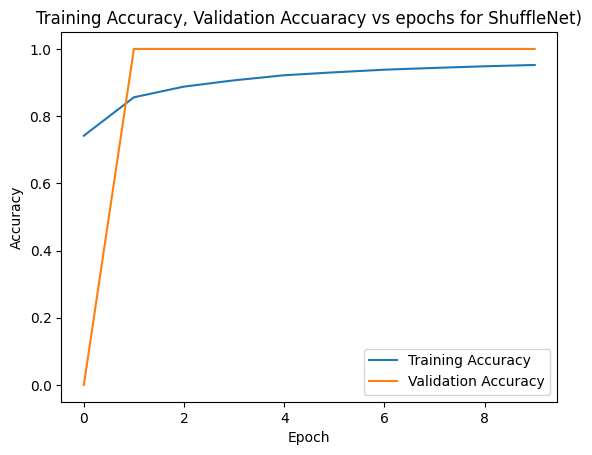

In [10]:

training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for ShuffleNet)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
     

Test Accuracy: 0.9495310067216041
[[4857   33   33   12   38]
 [  33 5049  373   23   43]
 [  67  276 5010   32   58]
 [  20   13   10 5062  163]
 [  21   17   33   31 5026]]


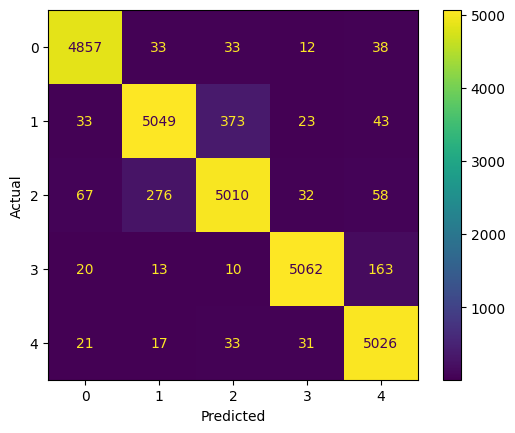

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4973
           1       0.94      0.91      0.93      5521
           2       0.92      0.92      0.92      5443
           3       0.98      0.96      0.97      5268
           4       0.94      0.98      0.96      5128

    accuracy                           0.95     26333
   macro avg       0.95      0.95      0.95     26333
weighted avg       0.95      0.95      0.95     26333



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import torch
import torchvision.models as models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in data_loader_test:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 26333 samples in 0.484s...
[t-SNE] Computed neighbors for 26333 samples in 940.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26333
[t-SNE] Computed conditional probabilities for sample 2000 / 26333
[t-SNE] Computed conditional probabilities for sample 3000 / 26333
[t-SNE] Computed conditional probabilities for sample 4000 / 26333
[t-SNE] Computed conditional probabilities for sample 5000 / 26333
[t-SNE] Computed conditional probabilities for sample 6000 / 26333
[t-SNE] Computed conditional probabilities for sample 7000 / 26333
[t-SNE] Computed conditional probabilities for sample 8000 / 26333
[t-SNE] Computed conditional probabilities for sample 9000 / 26333
[t-SNE] Computed conditional probabilities for sample 10000 / 26333
[t-SNE] Computed conditional probabilities for sample 11000 / 26333
[t-SNE] Computed conditional probabilities for sample 12000 / 26333
[t-SNE] Computed conditional probabilities for s

<ipython-input-12-10c55e74ae6f>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(target_names))
<ipython-input-12-10c55e74ae6f>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=target_name, c=cmap(i))
<ipython-input-12-10c55e74ae6f>:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use t

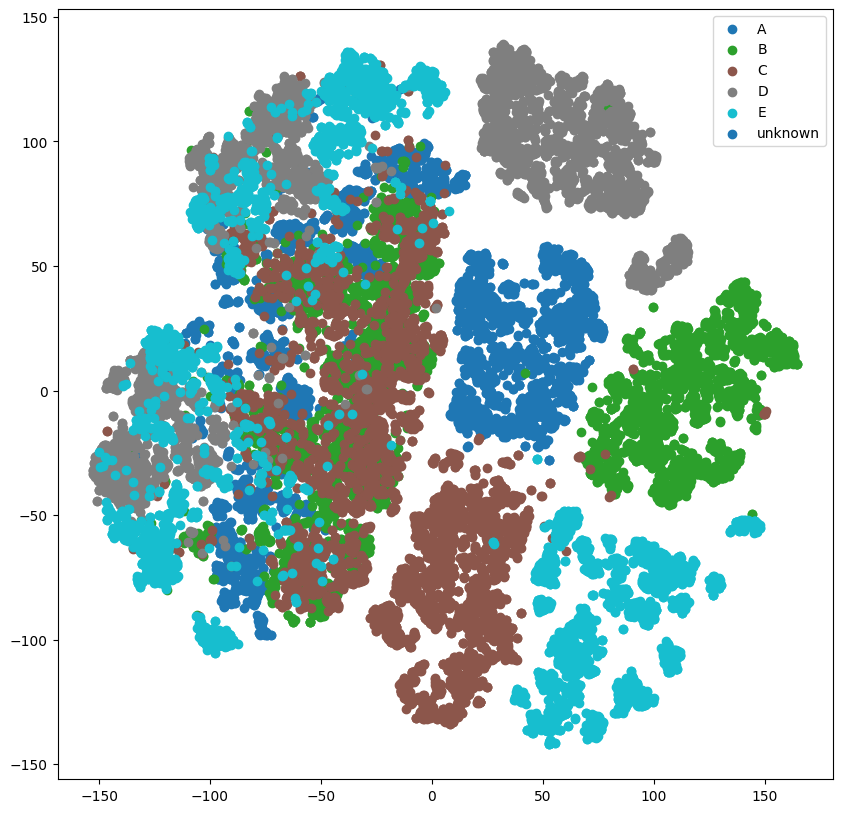

In [12]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import torchvision.models as models


device = torch.device('cuda')

model.to(device)

new_model = torch.nn.Sequential(*(list(model.children())[:-1]))

new_model.eval()

features = []
labels = []
for images, target in data_loader_test:
    images = images.to(device)
    with torch.no_grad():
        output = new_model(images)
        features.append(output.squeeze().cpu().numpy())
        labels.append(target.cpu().numpy())

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# reshape the features array to have two dimensions
n_samples = features.shape[0]
n_features = np.prod(features.shape[1:])
features = features.reshape((n_samples, n_features))

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000)
tsne_features = tsne.fit_transform(features)

target_names = list(data.class_to_idx.keys())

cmap = plt.cm.get_cmap('tab10', len(target_names))

u = labels == -1

plt.figure(figsize=(10, 10))
for i, target_name in enumerate(target_names):
    indices = labels == i
    plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=target_name, c=cmap(i))
plt.scatter(tsne_features[u, 0], tsne_features[u, 1], label="unknown", c=cmap(-1))
plt.legend()
plt.show()
